
# Project: Investigate a Dataset - [TMDB Movei dataset]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> TMDB movie dataset is a collection of more than 10,000 of movies with their cast and revenue and directors and the date of produce in this projet i will find some patterns in this dataset. 


### Question(s) for Analysis
> 1st question is about the release dates , like how many movie had produced in that year and the diffrence of the budgets in each movie.<br>
  2nd question is about the budgets of each movie to compare it with the rating to know if the budget is relating to the rating or not.<br>
  3rd question which genre has the highst movies<br>
  4th question Which length movies most liked by the audiences according to their popularity .<br>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

In [3]:
# Upgrade pandas to use dataframe.explode() function. 
#!pip install --upgrade pandas==0.25.0

    100% |████████████████████████████████| 10.5MB 2.3MB/s eta 0:00:01   63% |████████████████████▍           | 6.7MB 25.2MB/s eta 0:00:01    98% |███████████████████████████████▌| 10.3MB 27.7MB/s eta 0:00:01
    100% |████████████████████████████████| 13.4MB 3.1MB/s eta 0:00:01 0% |                                | 30kB 14.0MB/s eta 0:00:01    30% |█████████▊                      | 4.1MB 28.8MB/s eta 0:00:01    50% |████████████████▏               | 6.8MB 26.6MB/s eta 0:00:01    96% |███████████████████████████████ | 13.0MB 28.0MB/s eta 0:00:01
tensorflow 1.3.0 requires tensorflow-tensorboard<0.2.0,>=0.1.0, which is not installed.
  Found existing installation: numpy 1.12.1
    Uninstalling numpy-1.12.1:
      Successfully uninstalled numpy-1.12.1
  Found existing installation: pandas 0.23.3
    Uninstalling pandas-0.23.3:
      Successfully uninstalled pandas-0.23.3


<a id='wrangling'></a>
## Data Wrangling
**in this section i will going to read my dataset using the pandasfunction read_csv**

In [4]:
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


**to know how many coloumns and rows**

In [5]:
df.shape

(10866, 21)

**to know how many null values in the data set**

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [7]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09



### Data Cleaning

1- **dropping the duplicates form the dataset** 

In [8]:
df.drop_duplicates(inplace=True)
df.shape

(10865, 21)

2- **dropping the unused coloumns**

In [9]:
df.drop(['imdb_id','homepage','tagline','overview','budget_adj','revenue_adj'],axis =1,inplace = True)

**3-now we will see the data frame after dropping the duplicates and the unused coloumns**

In [10]:
df.head()

,id,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015
2,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,android|spaceship|jedi|space opera|3d,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015
4,168259,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,car race|speed|revenge|suspense|car,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 15 columns):
id                      10865 non-null int64
popularity              10865 non-null float64
budget                  10865 non-null int64
revenue                 10865 non-null int64
original_title          10865 non-null object
cast                    10789 non-null object
director                10821 non-null object
keywords                9372 non-null object
runtime                 10865 non-null int64
genres                  10842 non-null object
production_companies    9835 non-null object
release_date            10865 non-null object
vote_count              10865 non-null int64
vote_average            10865 non-null float64
release_year            10865 non-null int64
dtypes: float64(2), int64(6), object(7)
memory usage: 1.3+ MB


3-**changing the datetime formate**

In [12]:
df['release_date']=pd.to_datetime(df['release_date'])
df['release_date'].head()

0   2015-06-09
1   2015-05-13
2   2015-03-18
3   2015-12-15
4   2015-04-01
Name: release_date, dtype: datetime64[ns]

In [13]:
number_of_release=df['release_date'].dt.month.value_counts().sort_index()
number_of_release

1      919
2      691
3      822
4      797
5      809
6      827
7      799
8      918
9     1331
10    1153
11     814
12     985
Name: release_date, dtype: int64

drop the null values


In [14]:
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8666 entries, 0 to 10865
Data columns (total 15 columns):
id                      8666 non-null int64
popularity              8666 non-null float64
budget                  8666 non-null int64
revenue                 8666 non-null int64
original_title          8666 non-null object
cast                    8666 non-null object
director                8666 non-null object
keywords                8666 non-null object
runtime                 8666 non-null int64
genres                  8666 non-null object
production_companies    8666 non-null object
release_date            8666 non-null datetime64[ns]
vote_count              8666 non-null int64
vote_average            8666 non-null float64
release_year            8666 non-null int64
dtypes: datetime64[ns](1), float64(2), int64(6), object(6)
memory usage: 1.1+ MB


In [15]:
df.head()

,id,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015
2,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,android|spaceship|jedi|space opera|3d,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015
4,168259,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,car race|speed|revenge|suspense|car,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015


<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1 ( Which year has the highest release of movies?)

**counting the number of movies in each year**

In [16]:
data=df.groupby('release_year').count()['id']

**in this block of code i made a compare by using the plot to compare the number of movies with the year of release** 

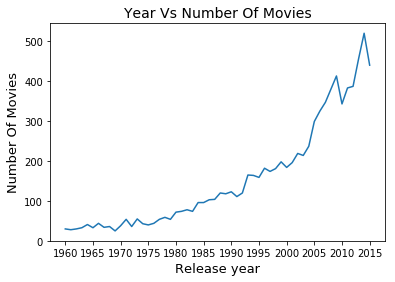

In [17]:
data.plot(xticks = np.arange(1960,2016,5))
sns.set(rc={'figure.figsize':(14,5)})
plt.title("Year Vs Number Of Movies",fontsize = 14)
plt.xlabel('Release year',fontsize = 13)
plt.ylabel('Number Of Movies',fontsize = 13)
sns.set_style("whitegrid")

so here we conclude that 2015 have the most released movies

Which Month Released Highest Number Of Movies In All Of The Years?

**comparing the number of movies in each month by countig the months in each month by using the datetime library**

In [18]:
number_of_release=df['release_date'].dt.month.value_counts().sort_index()
number_of_release

1      655
2      554
3      653
4      625
5      664
6      696
7      649
8      735
9     1061
10     910
11     652
12     812
Name: release_date, dtype: int64

**making a bar plot to compare the number of movies with the months of release**

Text(0,0.5,'Number of movie releases')

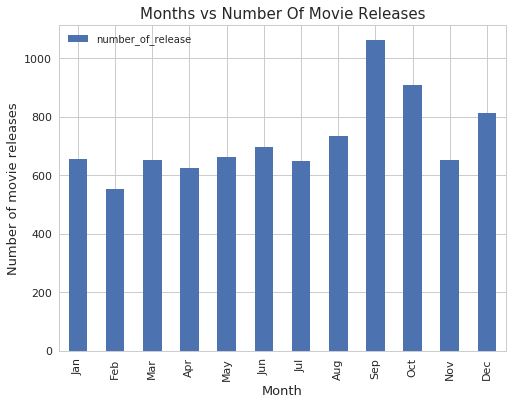

In [19]:
months=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
number_of_release = pd.DataFrame(number_of_release)
number_of_release['month'] = months
number_of_release.rename(columns = {'release_date':'number_of_release'},inplace=True)
number_of_release.plot(x='month',kind='bar',fontsize = 11,figsize=(8,6))
plt.title('Months vs Number Of Movie Releases',fontsize = 15)
plt.xlabel('Month',fontsize = 13)
plt.ylabel('Number of movie releases',fontsize = 13)

so here we conclude that september is the most month that has the most movies released

### Research Question 2  (Which genre has the highest movies?)

**this method will split and count the number of each genre**

In [20]:
def data(x):
    data_plot = df[x].str.cat(sep = '|')
    data = pd.Series(data_plot.split('|'))
    info = data.value_counts(ascending=False)
    return info

**here i used my method to split the data by using '|' so i can separate between the genres**

In [21]:
total_genre_movies = data('genres')
print(total_genre_movies)

Drama              3934
Comedy             3050
Thriller           2462
Action             2022
Romance            1415
Horror             1339
Adventure          1271
Crime              1200
Science Fiction    1028
Family              946
Fantasy             763
Mystery             703
Animation           512
Music               309
History             287
Documentary         270
War                 235
Western             154
TV Movie            115
Foreign              90
dtype: int64


**here i am comparing the genres by each other by the number of movies in eah genre**

Text(0,0.5,'Genres')

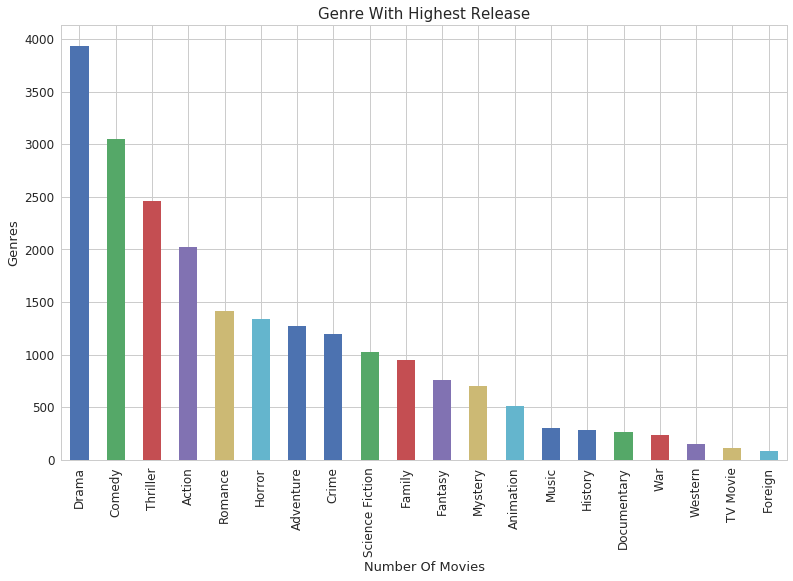

In [22]:
total_genre_movies.plot(kind= 'bar',figsize = (13,8),fontsize=12)
plt.title("Genre With Highest Release",fontsize=15)
plt.xlabel('Number Of Movies',fontsize=13)
plt.ylabel("Genres",fontsize= 13)

so here we conclude that the dramagenre has the highst number of movies

### Research Question 3 (the max and the min budget of the movies and comparing them to the year of release)

**in this section i fill the non numeric valus in the budget coloumn by 0 for the analysis
and then i got the maximum budget of the movies in the dataset and the minimum
and then i made a compare between the moveis by this plot here by getting the top ten movies with highst budget.**

In [23]:
df['budget'] = df['budget'].replace(0,np.NAN)
df['budget'].max()


425000000.0

In [24]:
df['budget'].min()

1.0

**in this section i made a bar plot to show the top ten movies of budget**

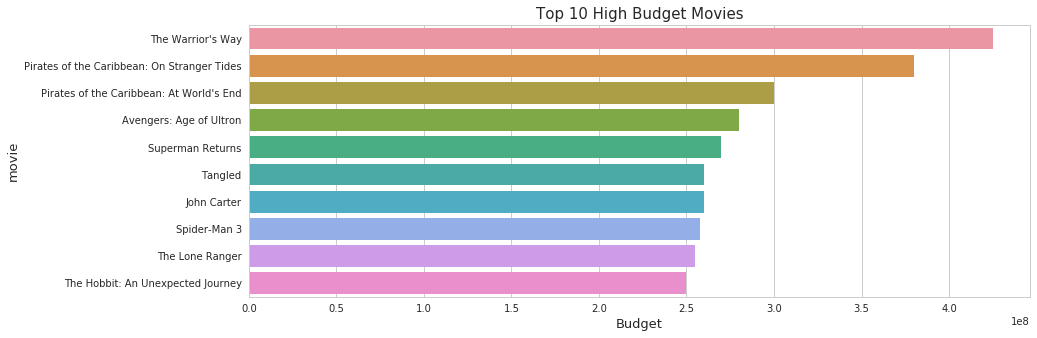

In [25]:
info = pd.DataFrame(df['budget'].sort_values(ascending = False))
info['original_title'] = df['original_title']
data = list(map(str,(info['original_title'])))
x = list(data[:10])
y = list(info['budget'][:10])
ax = sns.barplot(x=y,y=x)
sns.set(rc={'figure.figsize':(12,5)})
ax.set_title("Top 10 High Budget Movies",fontsize = 15)
ax.set_xlabel("Budget",fontsize = 13)
ax.set_ylabel("movie",fontsize = 13)
sns.set_style("darkgrid")

so we conclude that the warrior's way is the highst budget movie

## Research Question 4(Which length movies most liked by the audiences according to their popularity?)

in this section i made grid with the most popular length of the movies y comparing the runtiome and the average popularity

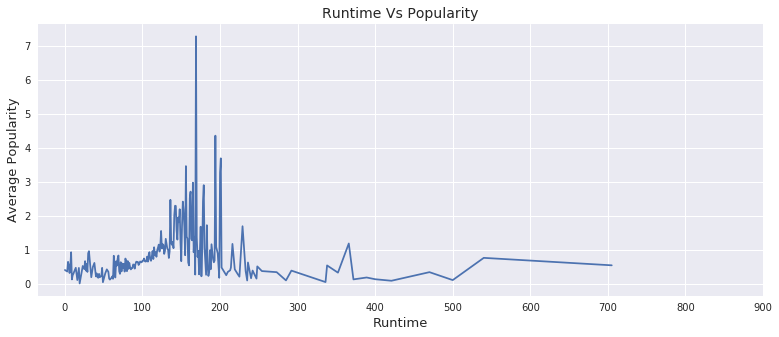

In [28]:
df.groupby('runtime')['popularity'].mean().plot(figsize = (13,5),xticks=np.arange(0,1000,100))
plt.title("Runtime Vs Popularity",fontsize = 14)
plt.xlabel('Runtime',fontsize = 13)
plt.ylabel('Average Popularity',fontsize = 13)
sns.set(rc={'figure.figsize':(15,8)})
sns.set_style("whitegrid")

so we conclude that the movies that has time between 100 and 200 min (1h30min)has the most popularity

<a id='conclusions'></a>
## Conclusions

>1-year 2014 year has the highest release of movies (700) followed by year 2013 (659) and year 2015 (629). 2-the higher number of release in september and october month. 3-Drame, Comedy, Thriller and Action are four most-made genres.4-the Movie Which Has Highest budget is The Warrior's Way and the Movie Which Has Lowest budget is Fear Clinic


## Limitations:


>we are not sure if the data provided to us is completel corect and up-to-date.the budget and revenue column do not have currency unit, it might be possible different movies have budget in different currency according to the country they are produce in. So a disparity arises here which can state the complete analysis wrong. i want to Drop the rows with missing values but it will affecte the overall analysis.During the data cleaning process, I split the data seperated by '|' into lists for easy parsing during the exploration phase. This increases the time taken in calculating the result.

In [25]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0